# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


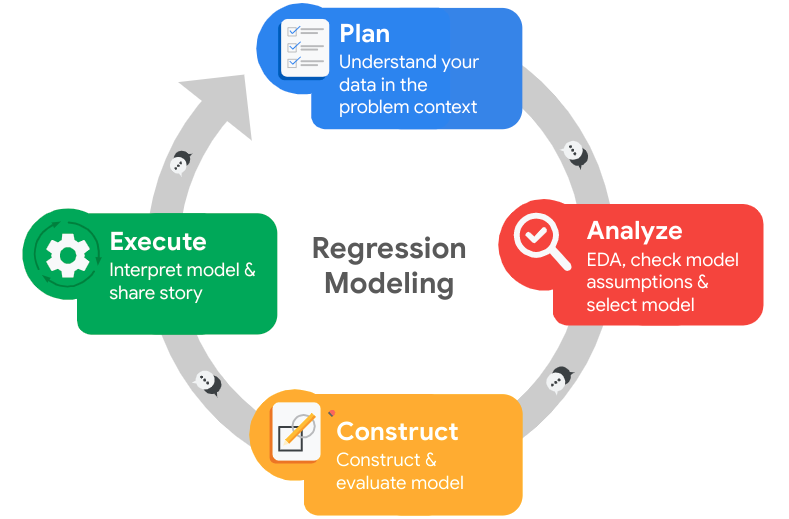

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 

import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,ConfusionMatrixDisplay
from sklearn.neighbors import KernelDensity



### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
HR_cap = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###

HR_cap.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###

HR_cap.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
HR_cap.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
for i in HR_cap.columns:
    if HR_cap[i].dtypes=='object':
        print(HR_cap[i].describe())

count     14999
unique       10
top       sales
freq       4140
Name: Department, dtype: object
count     14999
unique        3
top         low
freq       7316
Name: salary, dtype: object


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
### YOUR CODE HERE ###
HR_cap.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
### YOUR CODE HERE ###

# All columns are in snake case

# Display all column names after the update
### YOUR CODE HERE ###


### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
### YOUR CODE HERE ###

HR_cap.isna().sum().sum()

0

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
### YOUR CODE HERE ###

HR_cap.duplicated().sum()

3008

In [10]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###

HR_cap.duplicated()[HR_cap.duplicated()==True]

HR_cap_dup=HR_cap[HR_cap.duplicated()==True]

In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###

HR_cap_dup_ind=HR_cap_dup.index.tolist()
HR_cap=HR_cap.drop(index=HR_cap_dup_ind,axis=1)


# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###

HR_cap

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


### Check outliers

Check for outliers in the data.

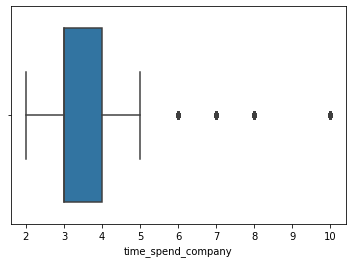

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

sns.boxplot(x=HR_cap['time_spend_company'])


In [13]:
q1=np.percentile(HR_cap['time_spend_company'],0.25)
q3=np.percentile(HR_cap['time_spend_company'],0.75)
HR_cap['time_spend_company'][(HR_cap['time_spend_company']<q1-1.5*(q3-q1)) & (HR_cap['time_spend_company']>q3+1.5*(q3-q1))]

Series([], Name: time_spend_company, dtype: int64)

Series([], Name: satisfaction_level, dtype: float64)
0
No.of Outliers 0.000


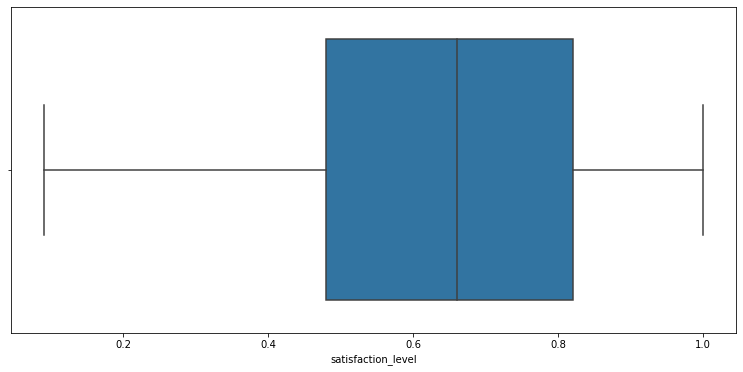

Series([], Name: last_evaluation, dtype: float64)
0
No.of Outliers 0.000


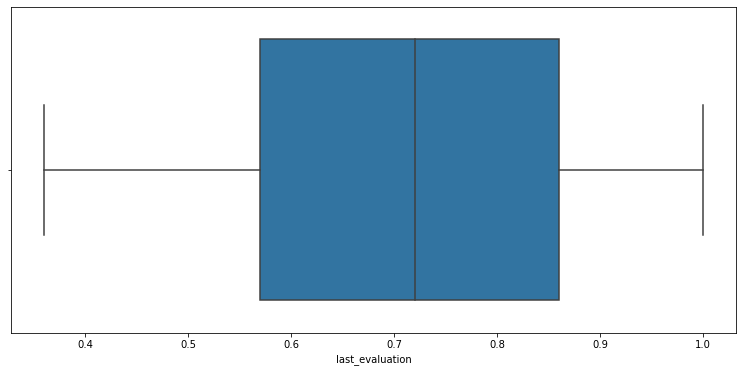

Series([], Name: number_project, dtype: int64)
0
No.of Outliers 0.000


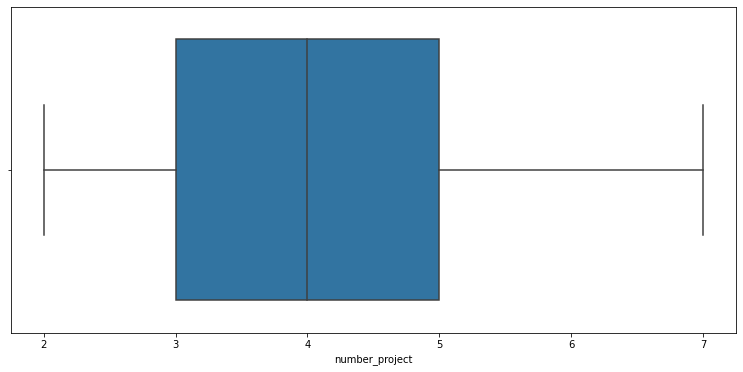

Series([], Name: average_montly_hours, dtype: int64)
0
No.of Outliers 0.000


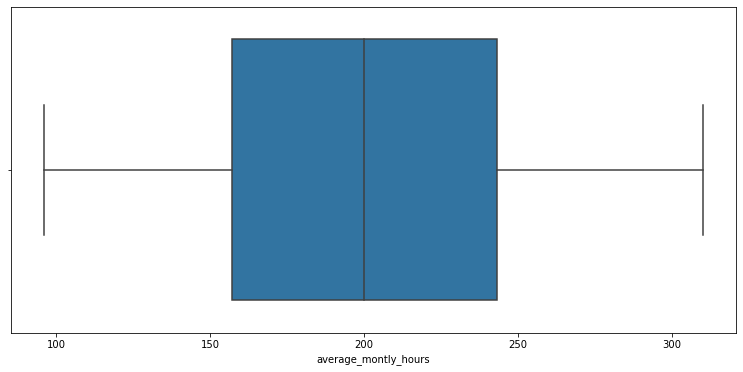

Series([], Name: time_spend_company, dtype: int64)
0
No.of Outliers 0.000


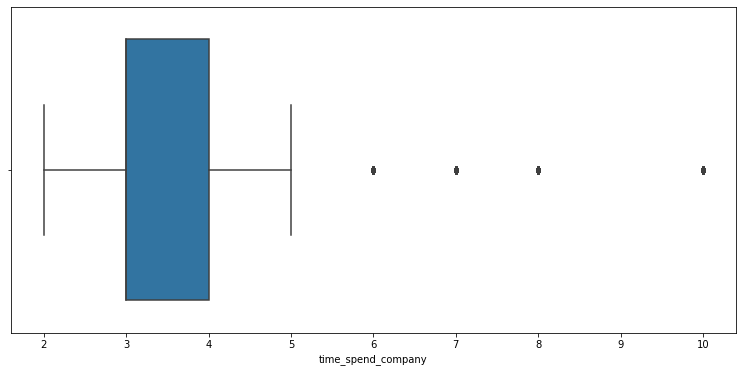

Series([], Name: Work_accident, dtype: int64)
0
No.of Outliers 0.000


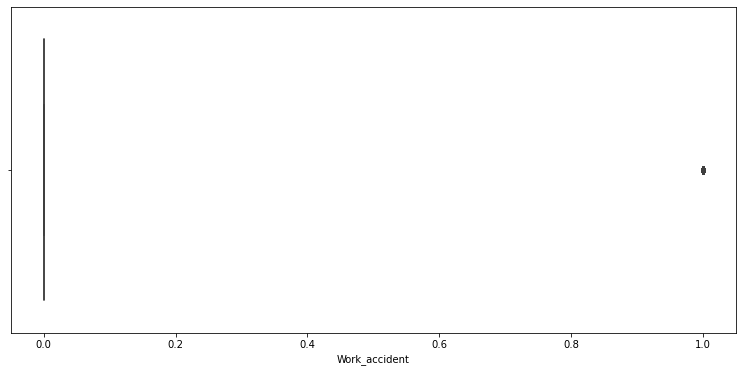

Series([], Name: left, dtype: int64)
0
No.of Outliers 0.000


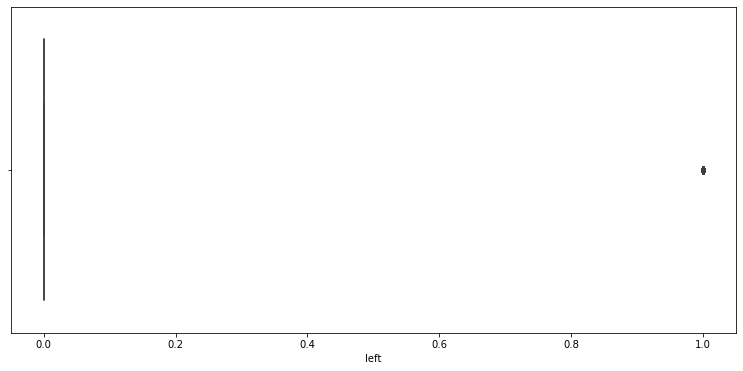

Series([], Name: promotion_last_5years, dtype: int64)
0
No.of Outliers 0.000


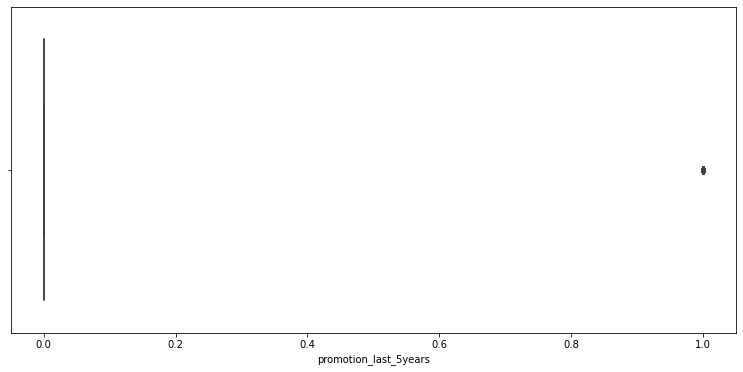

In [14]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

data_outliers=[]
HR_outl=[]
for i in HR_cap.columns:
    if HR_cap[i].dtypes!='object':
        q1=np.percentile(HR_cap[i],0.25)
        q3=np.percentile(HR_cap[i],0.75)
        data_outliers.append(HR_cap[i][(HR_cap[i]<q1-1.5*(q3-q1)) & (HR_cap[i]>q3+1.5*(q3-q1))].values.tolist())
        print(HR_cap[i][(HR_cap[i]<q1-1.5*(q3-q1)) & (HR_cap[i]>q3+1.5*(q3-q1))])
        HR_outl.extend([i for i in HR_cap[i][(HR_cap[i]<q1-1.5*(q3-q1)) & (HR_cap[i]>q3+1.5*(q3-q1))].index.tolist() if len(HR_cap[i][(HR_cap[i]<q1-1.5*(q3-q1)) & (HR_cap[i]>q3+1.5*(q3-q1))].index.tolist())==0])
        print(len(HR_outl))
        fig,ax=plt.subplots(figsize=(13,6))
        sns.boxplot(data=HR_cap,x=i,ax=ax)
        print('No.of Outliers','%.3f' % len(HR_outl))
        plt.show()
        

In [15]:
HR_outl

# There are no rows containing outliers

[]

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
## Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?


[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [16]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###

print('number of people stayed','%.2f' % HR_cap['left'].value_counts()[0])
print('number of people left','%.2f' % HR_cap['left'].value_counts()[1])
print('number of % people left','%.2f' % HR_cap['left'].value_counts(normalize=True)[0])
print('number of % people left','%.2f' % HR_cap['left'].value_counts(normalize=True)[1])


number of people stayed 10000.00
number of people left 1991.00
number of % people left 0.83
number of % people left 0.17


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

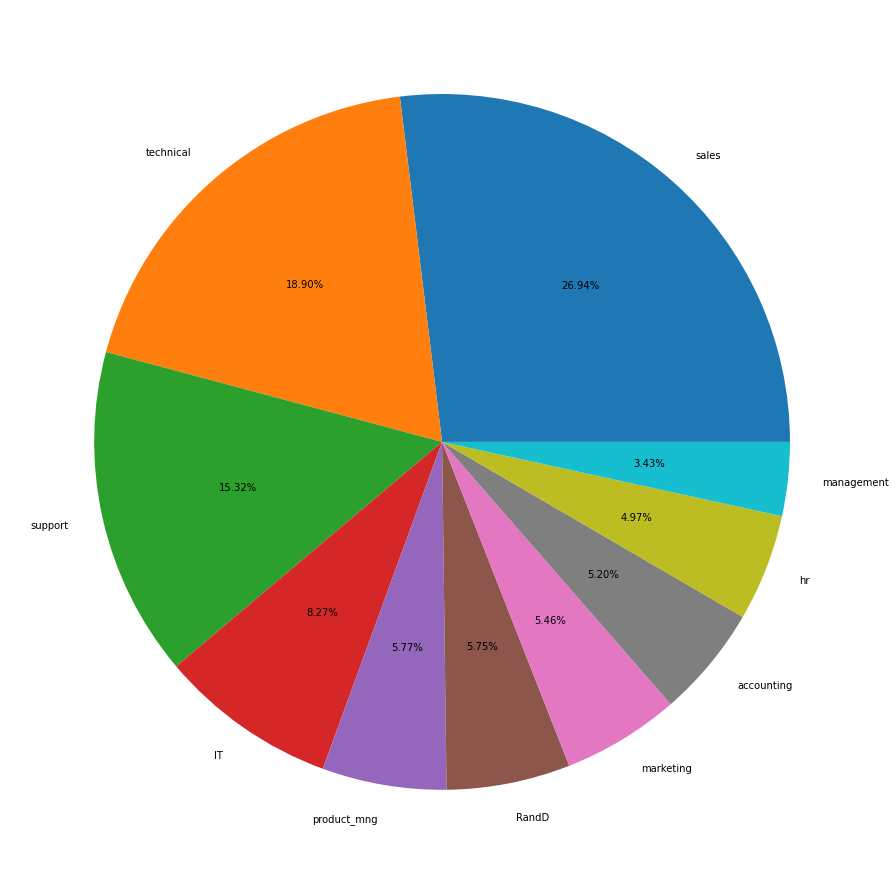

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###

pd.set_option('display.max_rows',43)

HR_cap_dep_pr=HR_cap[HR_cap['promotion_last_5years']==0]
HR_cap_dep_npr=HR_cap[HR_cap['promotion_last_5years']==1]

HR_cap_dep_pr.value_counts()



HR_cap_dep=HR_cap_dep_pr.groupby(['Department','promotion_last_5years'])['average_montly_hours'].sum().sort_values(ascending=False).reset_index()


cols_labels_pr=HR_cap_dep_pr.groupby(['Department','promotion_last_5years'])['average_montly_hours'].sum().sort_values(ascending=False).reset_index()['Department'].values.tolist()


cols_labels_npr=HR_cap_dep_npr.groupby(['Department','promotion_last_5years'])['average_montly_hours'].sum().sort_values(ascending=False).reset_index()['Department'].values.tolist()


# Sales has average monthly hours and highest promomtions for last 5 years


fig,ax=plt.subplots(figsize=(34,16))
ax.pie(HR_cap_dep_pr.groupby(['Department'])['average_montly_hours'].sum().sort_values(ascending=False),labels=cols_labels_pr,autopct='%.2f%%')
plt.show()

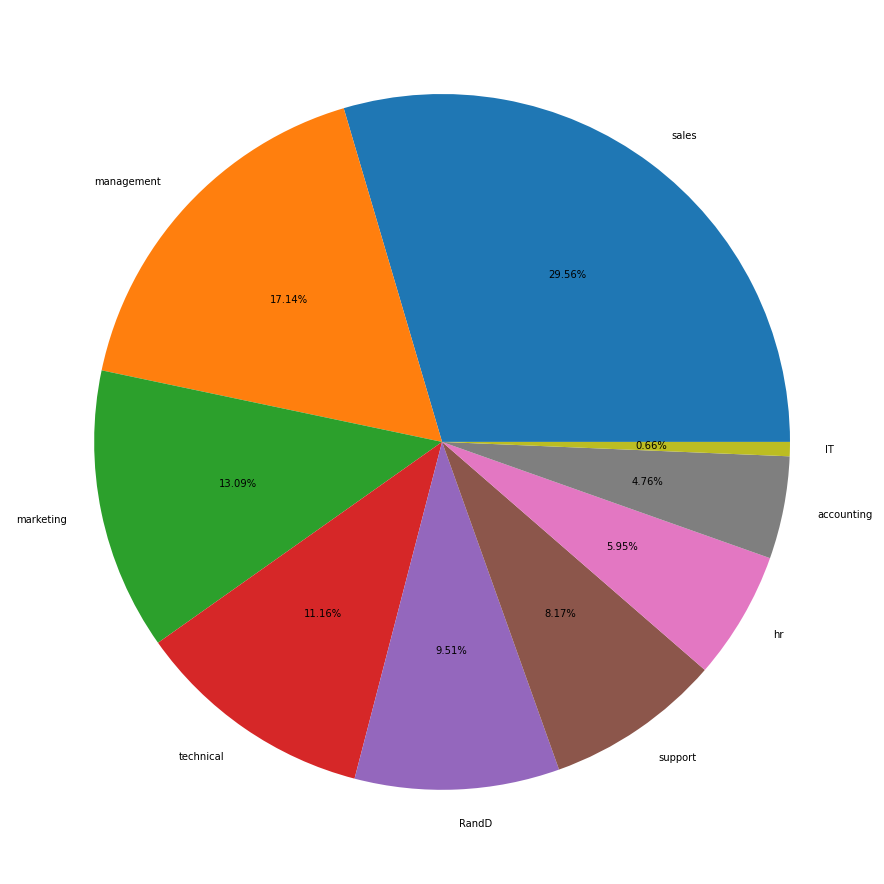

In [18]:
fig,ax=plt.subplots(figsize=(34,16))
ax.pie(HR_cap_dep_npr.groupby(['Department'])['average_montly_hours'].sum().sort_values(ascending=False),labels=cols_labels_npr,autopct='%.2f%%')
plt.show()

In [19]:
HR_cap.groupby('promotion_last_5years')['last_evaluation'].mean()

# both employees who got promoted and didn't get promoted both have same evaluation score

promotion_last_5years
0    0.716842
1    0.707438
Name: last_evaluation, dtype: float64

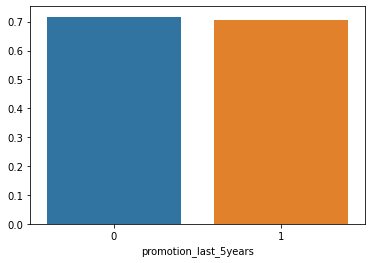

In [20]:
sns.barplot(HR_cap.groupby('promotion_last_5years')['last_evaluation'].mean().index,HR_cap.groupby('promotion_last_5years')['last_evaluation'].mean().values)

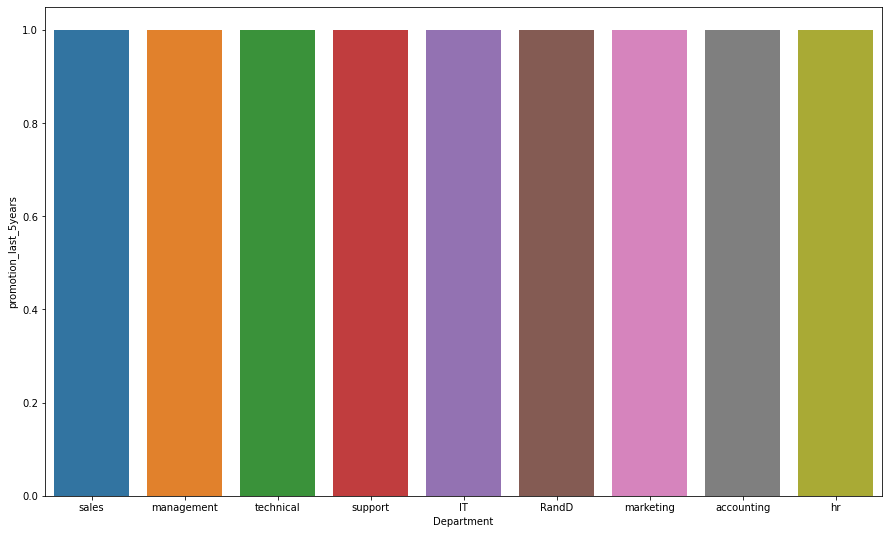

In [21]:
plt.subplots(figsize=(15,9))
sns.barplot(x='Department',y='promotion_last_5years',data=HR_cap_dep_npr)
plt.show()

# Product_mng department has no promotions within last years

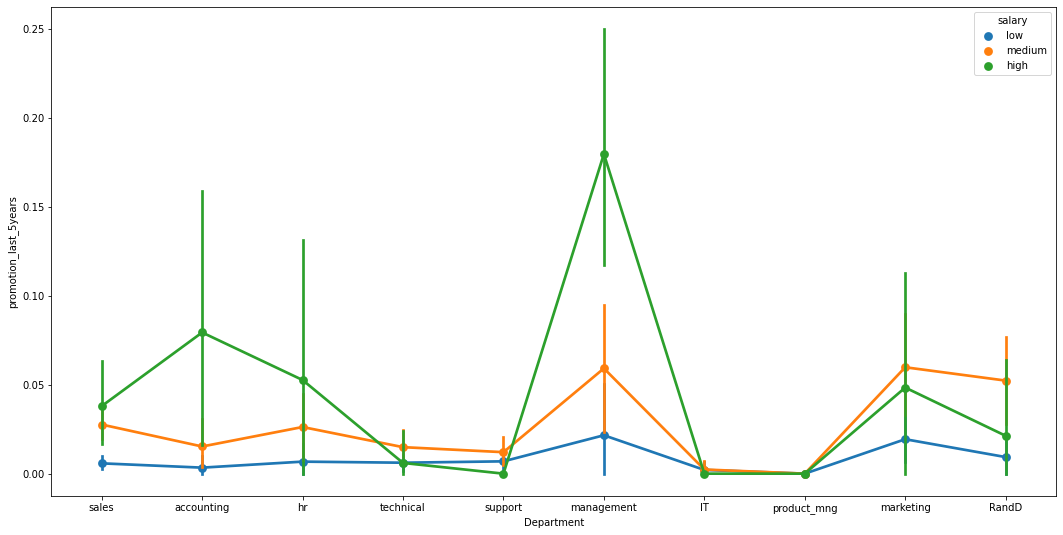

In [22]:
plt.subplots(figsize=(18,9))
sns.pointplot(x='Department',y='promotion_last_5years',data=HR_cap,hue='salary')
plt.show()

# Employees who have highest salary in management department got promoted in last 5 years,

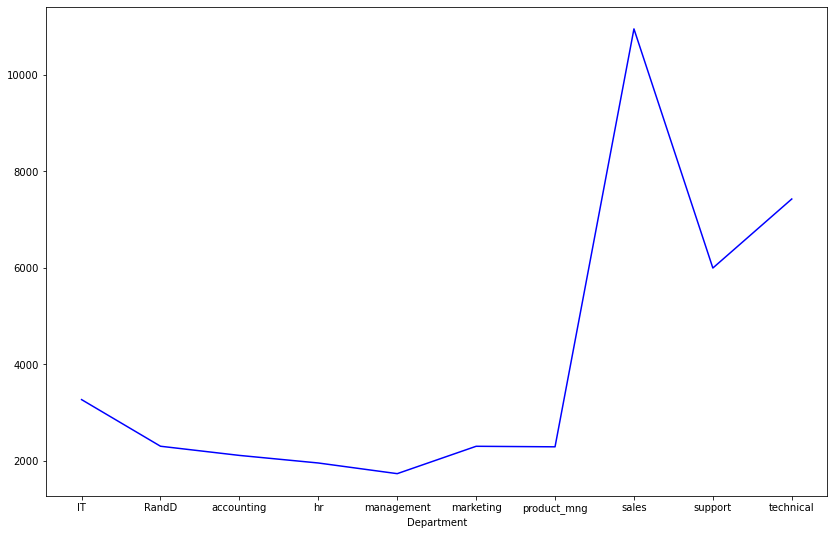

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###

plt.subplots(1,1,figsize=(14,9))
sns.lineplot(x=HR_cap.groupby(['Department'])['time_spend_company'].sum().index, y=HR_cap.groupby(['Department'])['time_spend_company'].sum().values,markers=True,color='b')
#sales have maximum time spent in company 



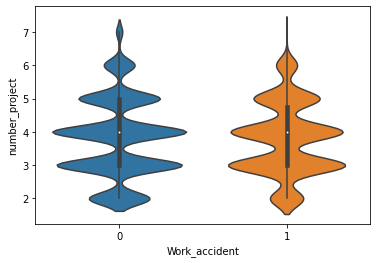

In [24]:
sns.violinplot(data=HR_cap,x='Work_accident',y='number_project')
#sales have maximum time spent in company 
# There is no relationship between average monthly hours and satisfaction level


In [25]:
HR_cap_pr=HR_cap.groupby(['promotion_last_5years','Work_accident'])['number_project'].sum().reset_index()

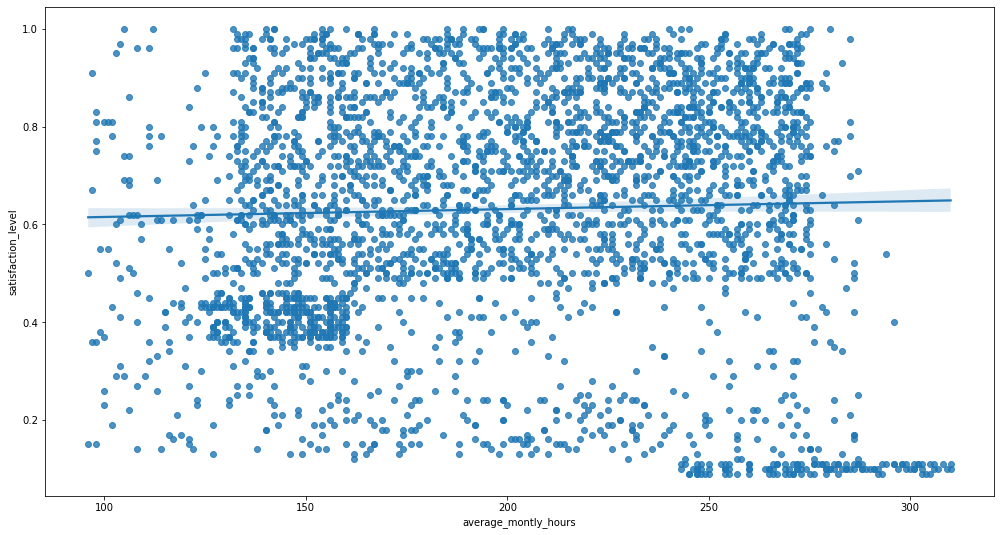

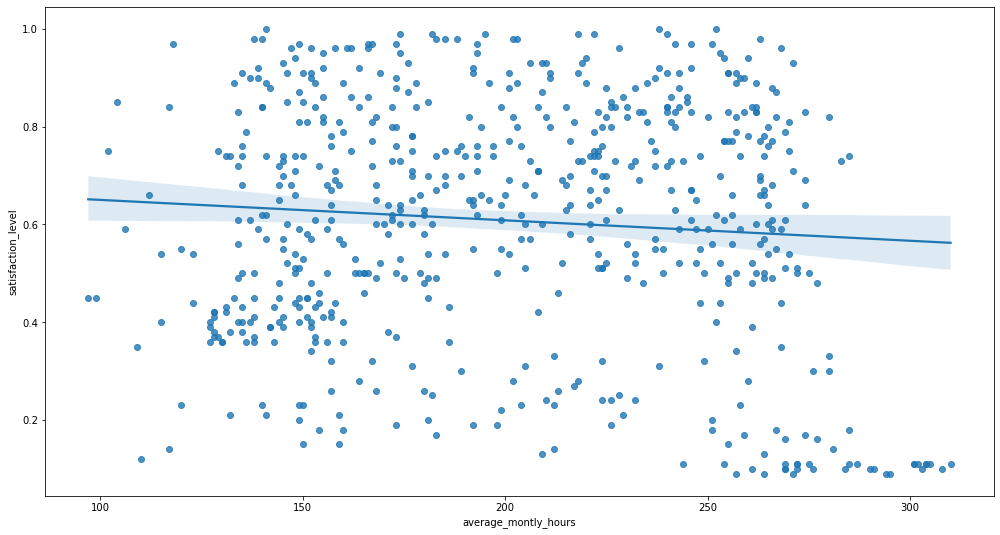

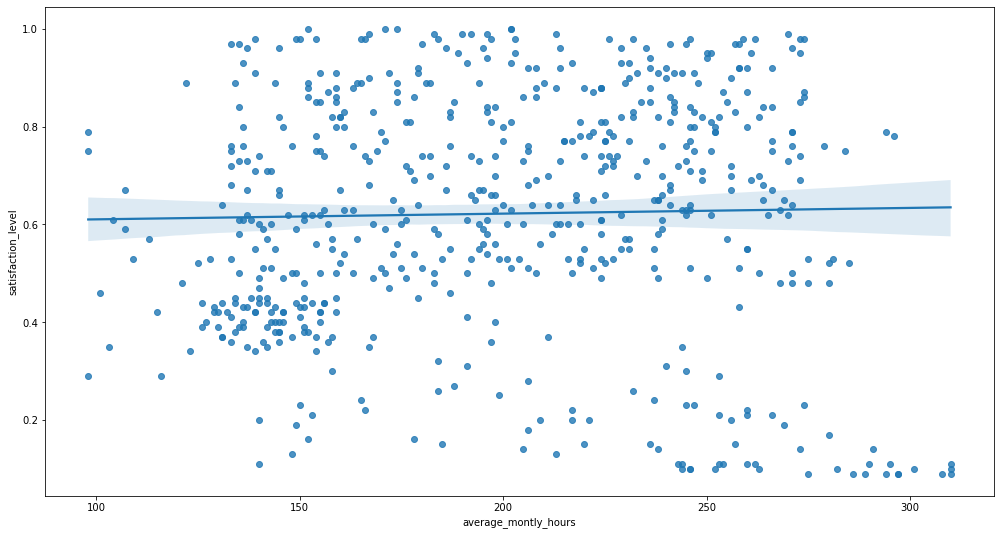

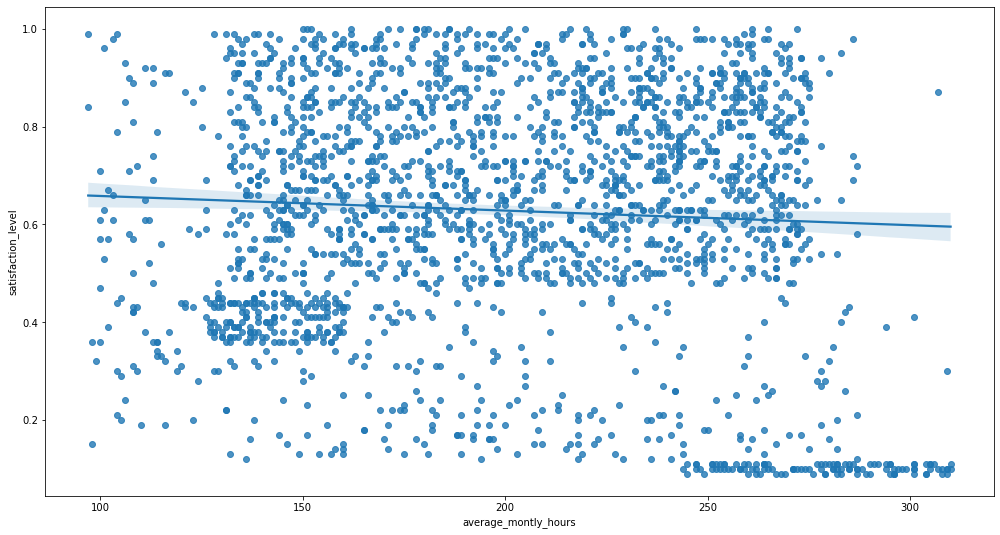

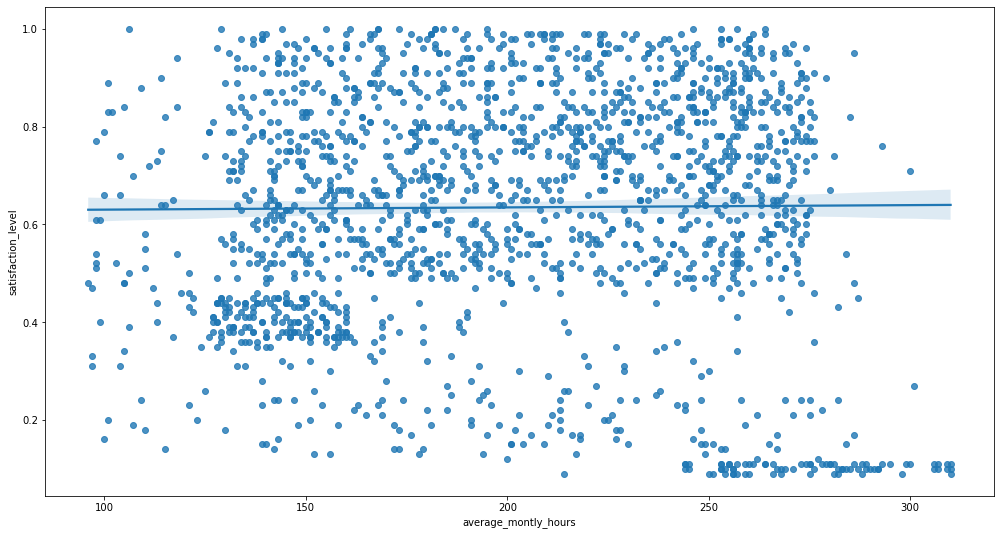

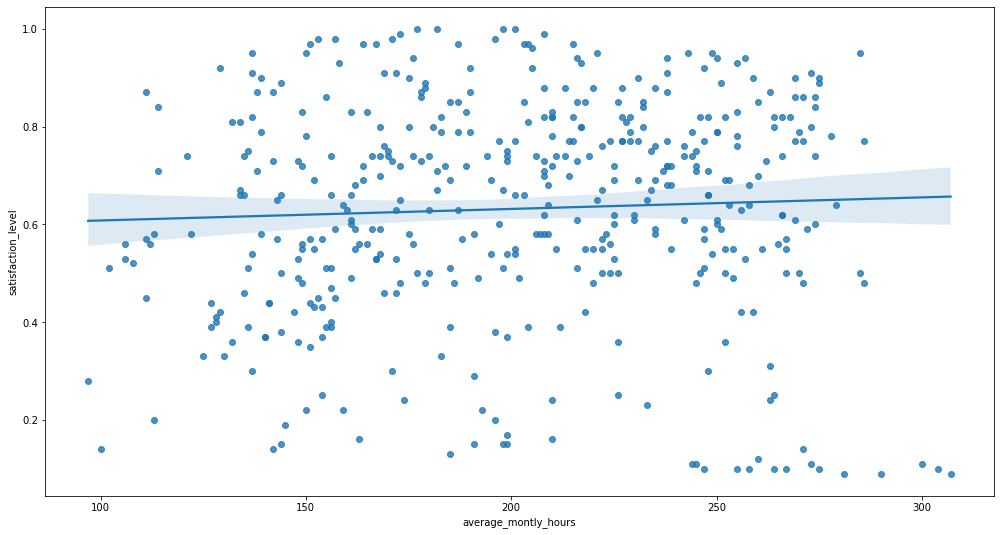

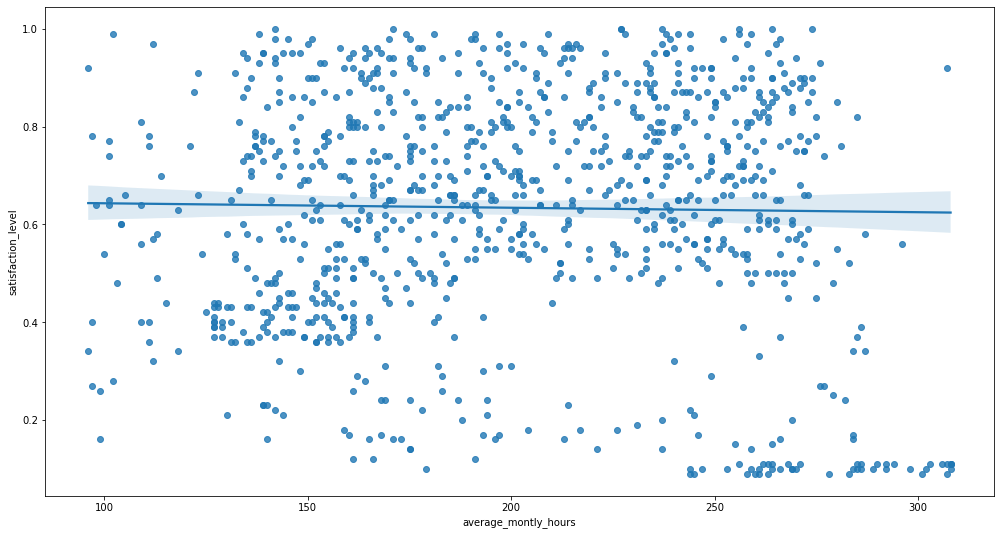

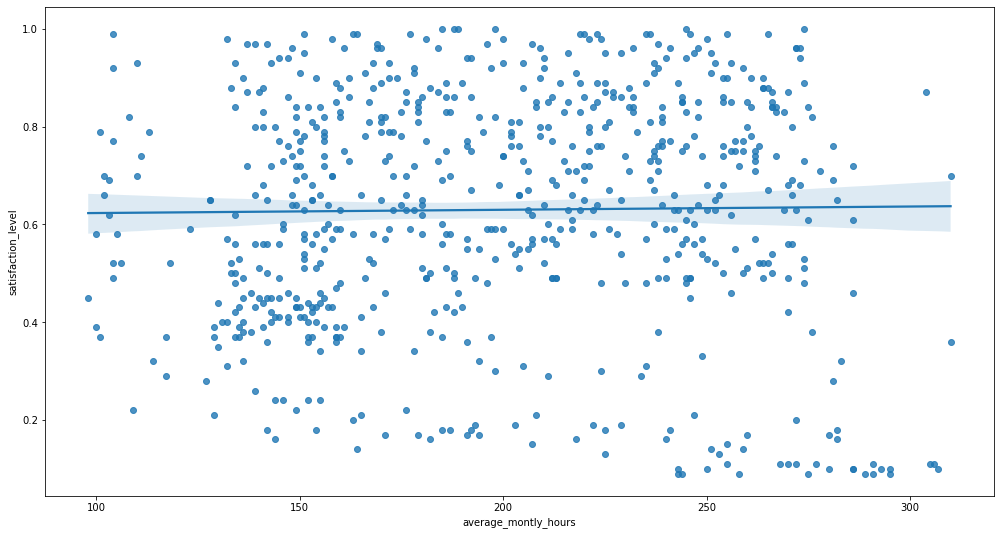

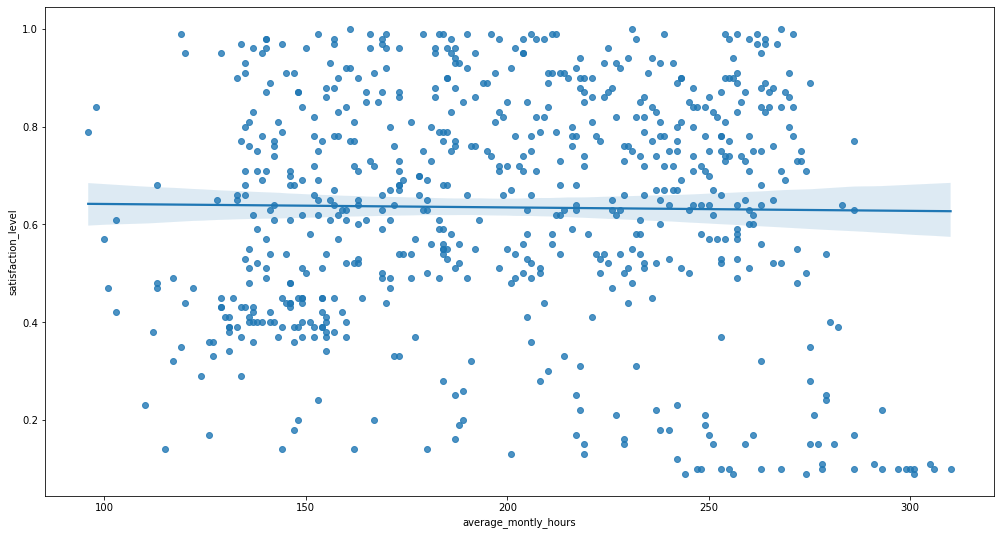

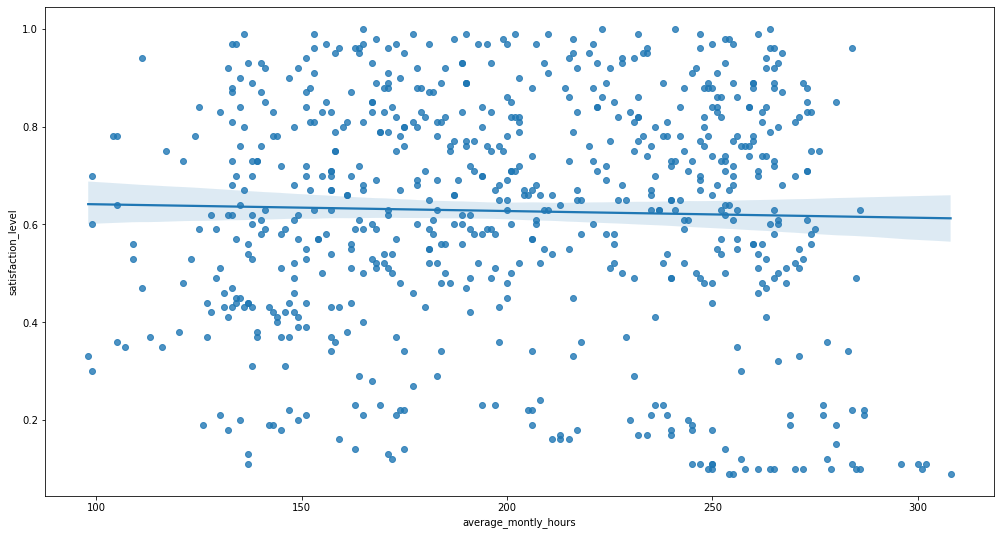

In [26]:
for i in HR_cap['Department'].unique().tolist():
    plt.subplots(figsize=(17,9))
    sns.regplot(x='average_montly_hours',y='satisfaction_level',data=HR_cap[HR_cap['Department']==i])
    plt.show()

# There is no relationship between average monthly hours and satisfaction level within each department


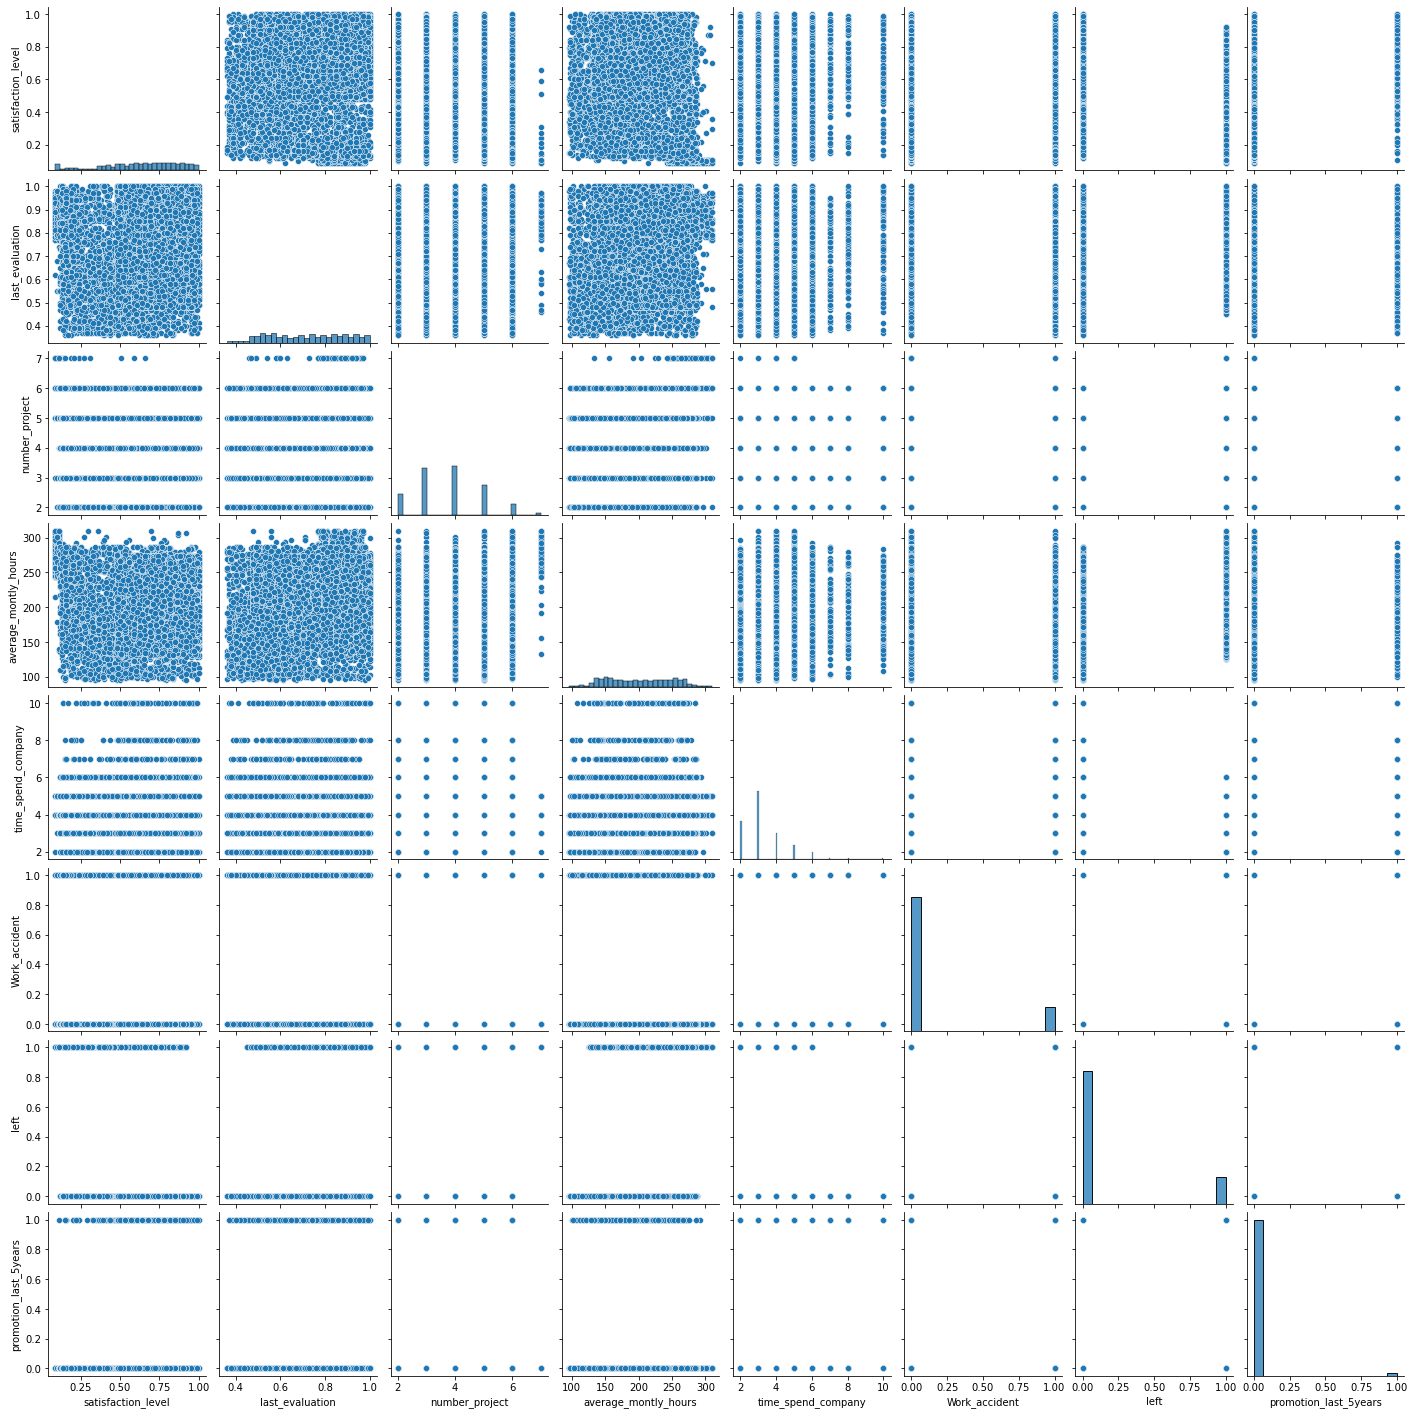

In [27]:
sns.pairplot(HR_cap)

In [28]:
model_kd=KernelDensity(kernel='gaussian',bandwidth=0.5)
X=np.array(HR_cap['average_montly_hours']).reshape(-1,1)
model_kd.fit(X)
model_kd.score_samples(X)
HR_cap['average_monthly_hours_gau']=pd.Series(model_kd.score_samples(X))
HR_cap['average_monthly_hours_gau']=HR_cap['average_monthly_hours_gau'].fillna(HR_cap['average_monthly_hours_gau'].mean())

In [29]:
model_kd=KernelDensity(kernel='gaussian',bandwidth=0.5)
X=np.array(HR_cap['last_evaluation']).reshape(-1,1)
model_kd.fit(X)
model_kd.score_samples(X)
HR_cap['last_evaluation_1']=pd.Series(model_kd.score_samples(X))
HR_cap['last_evaluation_1']=HR_cap['last_evaluation_1'].fillna(HR_cap['last_evaluation_1'].mean())

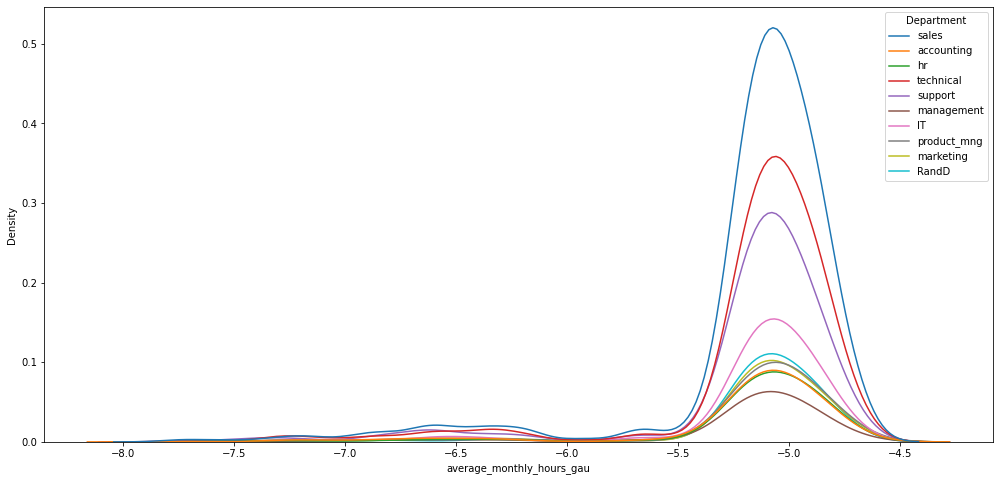

In [30]:
plt.subplots(1,1,figsize=(17,8))
sns.kdeplot(x='average_monthly_hours_gau',data=HR_cap,hue='Department')
plt.show()

# Department management has lowest median average monthly hours and sales has highest median average monthly hours

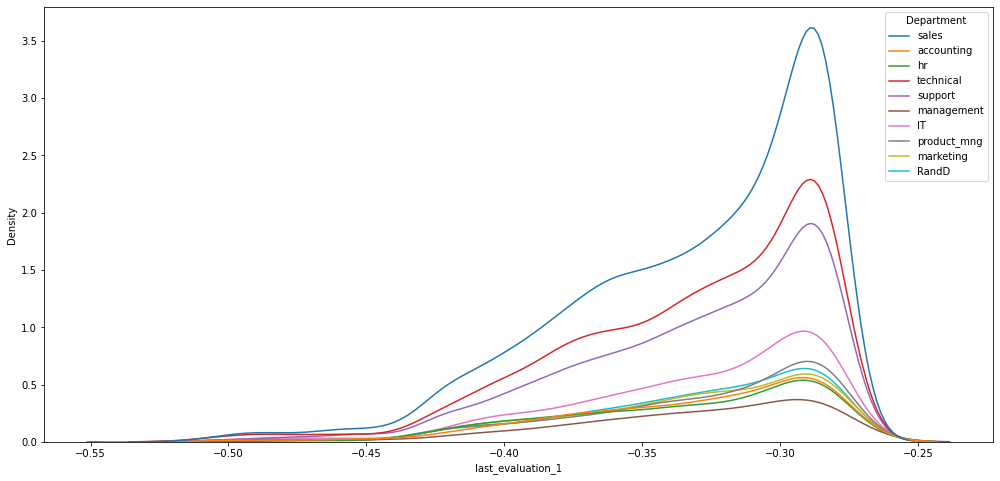

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,average_monthly_hours_gau
0,0.38,0.53,2,157,3,0,1,0,sales,low,-4.802282
1,0.80,0.86,5,262,6,0,1,0,sales,medium,-5.156614
2,0.11,0.88,7,272,4,0,1,0,sales,medium,-5.060688
3,0.72,0.87,5,223,5,0,1,0,sales,low,-5.062704
4,0.37,0.52,2,159,3,0,1,0,sales,low,-4.861893
...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high,-5.171815
11996,0.74,0.95,5,266,10,0,0,1,management,high,-5.171815
11997,0.85,0.54,3,185,10,0,0,1,management,high,-5.171815
11998,0.33,0.65,3,172,10,0,0,1,marketing,high,-5.171815


In [31]:
plt.subplots(1,1,figsize=(17,8))
sns.kdeplot(x='last_evaluation_1',data=HR_cap,hue='Department')
plt.show()

HR_cap.drop('last_evaluation_1',axis=1)
# Department management has lowest median average last evaluation and sales has highest median average monthly hours

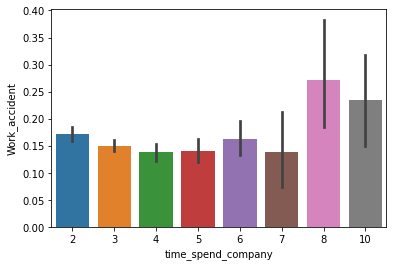

In [32]:
# Create a plot as needed
### YOUR CODE HERE ###


sns.barplot(y='Work_accident',x='time_spend_company',data=HR_cap)

# emplopyees with Time spend company of 8 years have highest work accident 

In [33]:
HR_cap.groupby('salary')['last_evaluation'].sum()


# employees with low salary have highest last year evaluation scores. This means that employees who are having more evaluation scores infact having less salaires

salary
high       699.77
low       4124.26
medium    3769.71
Name: last_evaluation, dtype: float64

In [34]:
model_kd=KernelDensity(kernel='gaussian',bandwidth=0.5)
X=np.array(HR_cap['satisfaction_level']).reshape(-1,1)
model_kd.fit(X)
model_kd.score_samples(X)
HR_cap['satisfaction_level_1']=pd.Series(model_kd.score_samples(X))
HR_cap['satisfaction_level_1']=HR_cap['satisfaction_level_1'].fillna(HR_cap['satisfaction_level_1'].mean())

In [35]:
HR_cap['Department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: Department, dtype: int64

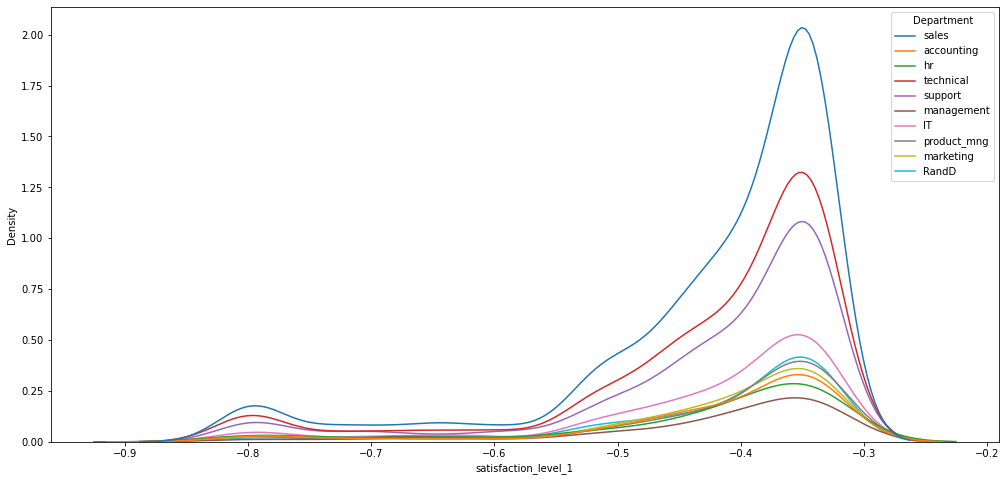

In [36]:
plt.subplots(1,1,figsize=(17,8))
sns.kdeplot(x='satisfaction_level_1',data=HR_cap,hue='Department')
plt.show()



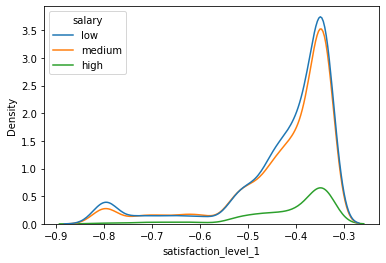

In [37]:
sns.kdeplot(x='satisfaction_level_1',data=HR_cap,hue='salary')

# Employees with high salary have lower satisfaction level as the curve has more flatness and the median satisfaction
# level is low compared to low and medium salaries

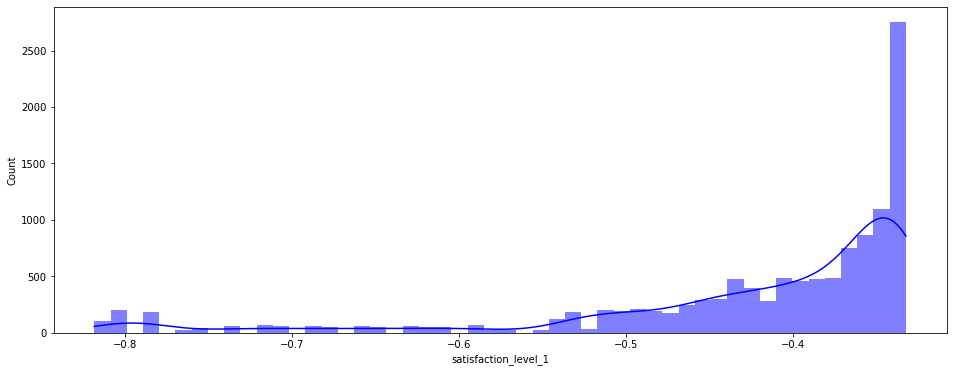

In [38]:
plt.subplots(figsize=(16,6))
sns.histplot(x='satisfaction_level_1',kde=True,data=HR_cap,linewidth=0,color='b',element='bars')
plt.show() 

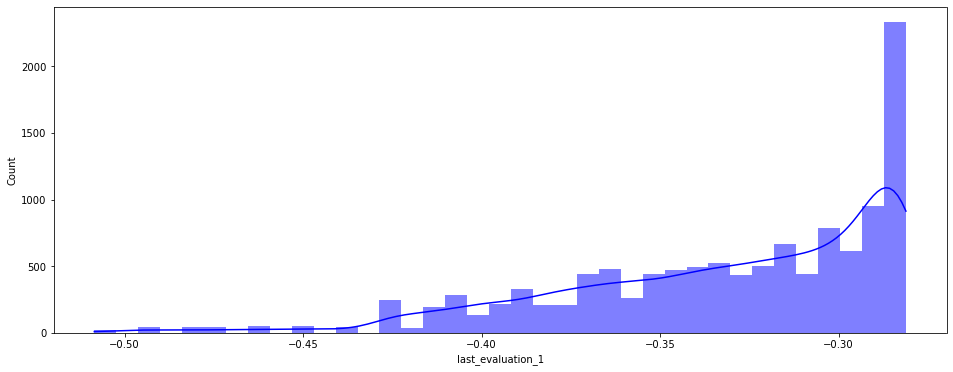

In [39]:
plt.subplots(figsize=(16,6))
sns.histplot(x='last_evaluation_1',kde=True,data=HR_cap,linewidth=0,color='b',element='bars')
plt.show()

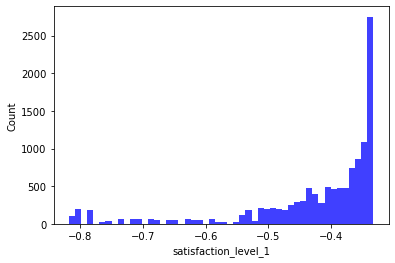

In [40]:
sns.histplot(x='satisfaction_level_1',data=HR_cap,linewidth=0,color='b',element='bars')

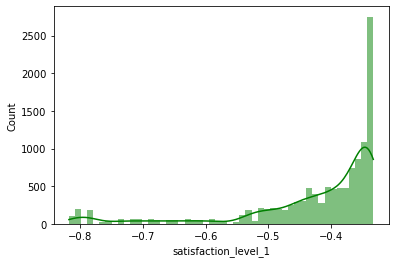

In [41]:
sns.histplot(x='satisfaction_level_1',data=HR_cap,kde=True,linewidth=0,color='g')

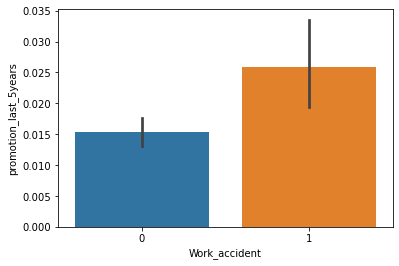

In [42]:
# Create a plot as needed
### YOUR CODE HERE ###

sns.barplot(x='Work_accident',y='promotion_last_5years',data=HR_cap) 

# People who had work accident happened to them has gotten promotion within last 5 years 


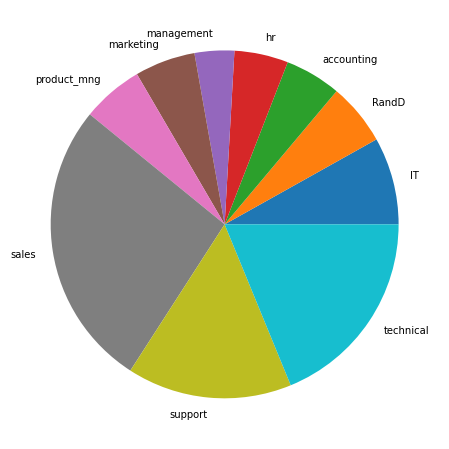

In [43]:
# Create a plot as needed
### YOUR CODE HERE ###

Dep_cols=HR_cap.groupby('Department')['last_evaluation'].sum().index.tolist()

plt.subplots(figsize=(19,8))
plt.pie(HR_cap.groupby('Department')['last_evaluation'].sum(),labels=Dep_cols)
plt.show()


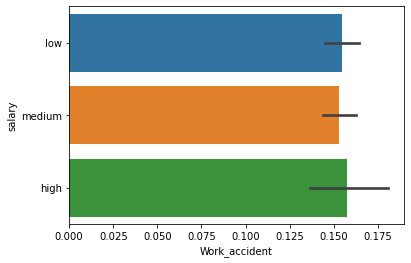

In [44]:
# Create a plot as needed
### YOUR CODE HERE ###

sns.barplot(x='Work_accident',y='salary',data=HR_cap) 

# People who have more salary or high salary has more work accidents


### Insights

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

In [45]:
# labelencoder 

model_l=LabelEncoder()
HR_cap['Department']=model_l.fit_transform(HR_cap['Department'])
HR_cap['salary']=model_l.fit_transform(HR_cap['salary'])

In [46]:
# determining the multicollinearity among indepdent variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

X=HR_cap.drop(['left','average_monthly_hours_gau','last_evaluation_1','satisfaction_level_1'],axis=1)
X.columns
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 
vif = zip(X, vif) 
print(list(vif))

[('satisfaction_level', 7.004666993123233), ('last_evaluation', 19.31244074634266), ('number_project', 13.68803030643326), ('average_montly_hours', 18.392629024229716), ('time_spend_company', 7.192604721931158), ('Work_accident', 1.182572864251216), ('promotion_last_5years', 1.023092698194956), ('Department', 4.7017578130860125), ('salary', 5.168759501589853)]


### Identify the types of models most appropriate for this task.

The models that would be appropriate for this task would be LogisticRegression,DecisionTrees,RandomForestRegressor,Naive Bays

### Modeling

Add as many cells as you need to conduct the modeling process.

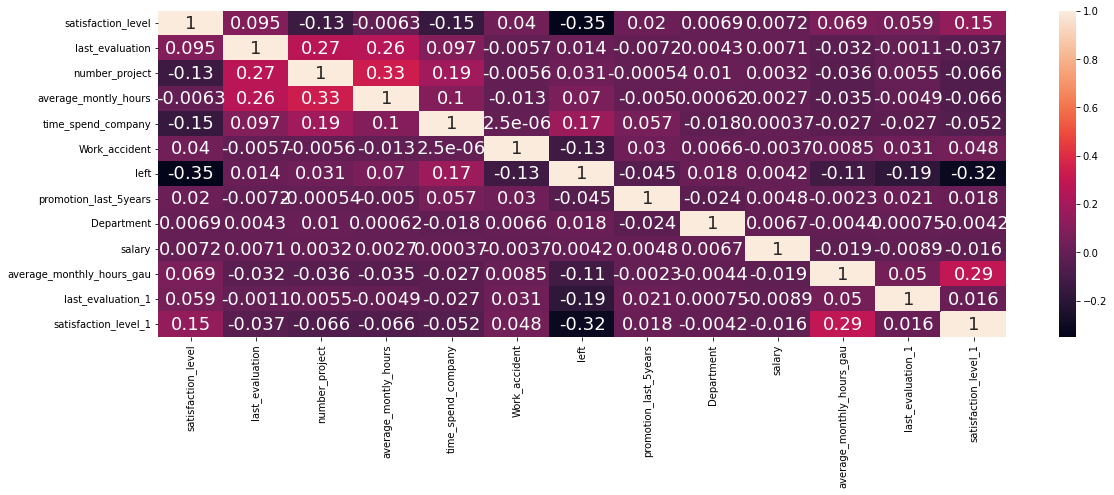

In [47]:
### YOUR CODE HERE ###

HR_cap.corr()

plt.subplots(figsize=(19,6))
sns.heatmap(HR_cap.corr(),annot=True,annot_kws={'fontsize':18})
plt.show()

# The target feature left is least correleated with satisfaction_level independent feature

In [48]:


model_ols=sm.Logit.from_formula('left ~ C(Department)+C(salary)+promotion_last_5years+Work_accident+time_spend_company+average_montly_hours+number_project+last_evaluation+satisfaction_level',HR_cap).fit()


Optimization terminated successfully.
         Current function value: 0.357914
         Iterations 8


In [49]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                11991
Model:                          Logit   Df Residuals:                    11972
Method:                           MLE   Df Model:                           18
Date:                Fri, 19 Jul 2024   Pseudo R-squ.:                  0.2038
Time:                        21:19:00   Log-Likelihood:                -4291.8
converged:                       True   LL-Null:                       -5390.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.1059      0.244     -8.647      0.000      -2.583      -1.629
C(Department)[T.1]       -0.3362      0.160     -2.098      0.036      -0.650      -0.022
C(Department)[T.2]        0.0159      0.153      0.104      0.917      -0.284       0.316
C(Department)[T.3]        0.1637      0.151      1.081      0.280      -0.133       0.461
C(Department)[T.4]       -0.2058      0.191     -1.077      0.281      -0.580       0.169
C(Department)[T.5]        0.0659      0.152      0.434      0.664      -0.232       0.364
C(Department)[T.6]       -0.0089      0.150     -0.059      0.953      -0.303       0.286
C(Department)[T.7]        0.0718      0.110      0.651      0.515      -0.144       0.288
C(Department)[T.8]        0.1425      0.119      1.194      0.232      -0.091       0.376
C(Department)[T.9]        0.1092      0.116      0.945      0.345      -0.117       0.336
C(salary)[T.1]            1.8320      0.164     11.177      0.000       1.511       2.153
C(salary)[T.2]            1.3831      0.165      8.394      0.000       1.060       1.706
promotion_last_5years    -1.4601      0.384     -3.799      0.000      -2.213      -0.707
Work_accident            -1.4376      0.111    -12.960      0.000      -1.655      -1.220
time_spend_company        0.3082      0.020     15.241      0.000       0.269       0.348
average_montly_hours      0.0042      0.001      6.688      0.000       0.003       0.005
number_project           -0.2858      0.026    -11.031      0.000      -0.337      -0.235
last_evaluation           0.6054      0.180      3.360      0.001       0.252       0.959
satisfaction_level       -4.0088      0.121    -33.075      0.000      -4.246      -3.771
=========================================================================================
"""

In [50]:
# linearity of independent variables w.r.t to target variable by annova test 

HR_cap[HR_cap['left']==1]
HR_cap[HR_cap['left']==0]

sm.stats.anova_lm

<function statsmodels.stats.anova.anova_lm(*args, **kwargs)>

In [51]:

#X=X.drop('Department',axis=1)
y=HR_cap['left']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

model_logistic=LogisticRegression()

x_train=x_train.astype('float64')


In [52]:
model_logistic.fit(x_train,y_train)

LogisticRegression()

In [53]:
# Train data accuracy
train_score=model_logistic.score(x_train,y_train)

#Test data accuracy
test_score=model_logistic.score(x_test,y_test)

print('Train accuracy','%.4f' %(train_score))
print('Test accuracy ','%.4f' %(test_score))

Train accuracy 0.8359
Test accuracy  0.8335


In [54]:
print(model_logistic.coef_)

[[-3.78489771  0.36391349 -0.28801413  0.00601202  0.26451242 -1.19514343
  -0.58833113  0.02776386 -0.02942087]]


In [55]:
print(model_logistic.intercept_)

[-0.84128197]


In [56]:
y_pred=model_logistic.predict(x_test)

In [57]:
model_logistic.classes_

array([0, 1])

Precision score 0.510
recall score 0.177
accuracy score 0.834
f1_score  0.263


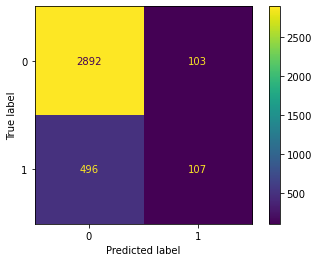

In [58]:
print('Precision score', '%.3f' % precision_score(y_test,y_pred))
print('recall score',  '%.3f' % recall_score(y_test,y_pred))
print('accuracy score',  '%.3f' % accuracy_score(y_test,y_pred))
print('f1_score ',  '%.3f' % f1_score(y_test,y_pred))

# Compute values for confusion matrix
### YOUR CODE HERE ###
cm=confusion_matrix(y_test,y_pred)

# Create display of confusion matrix
### YOUR CODE HERE ###
disp=ConfusionMatrixDisplay(cm)
disp.plot()

plt.show()



Decision Trees with GridSearch cross validation with parameters min_samples_leaf, min_samples_split and max_depth 


In [59]:
# decision trees


parms={'min_samples_leaf':[3,1,2],'min_samples_split':[6,2,5]}
scoring = {'accuracy', 'precision', 'recall', 'f1'}
model_d=DecisionTreeClassifier(random_state=0,max_depth=15)
model_g=GridSearchCV(model_d,parms,cv=5,scoring=scoring,refit='f1')
model_g.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=15, random_state=0),
             param_grid={'min_samples_leaf': [3, 1, 2],
                         'min_samples_split': [6, 2, 5]},
             refit='f1', scoring={'recall', 'precision', 'accuracy', 'f1'})

In [60]:
y_pred=model_g.predict(x_test)

In [61]:
# Train data accuracy
train_score=model_g.score(x_train,y_train)

#Test data accuracy
test_score=model_g.score(x_test,y_test)

print('Train accuracy','%.4f' %(train_score))
print('Test accuracy ','%.4f' %(test_score))



Train accuracy 0.9668
Test accuracy  0.9309


In [62]:
model_g.best_estimator_

DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=6,
                       random_state=0)

In [63]:
model_g.best_score_

0.9342170483012664

In [64]:
model_g.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 6}

In [65]:
def make_results(model_object):
    results=model_object.cv_results_
    cols=[i for i in results.keys() if i.startswith('mean')]
    mean_cols=[results[i] for i in cols]
    mean_cols=[list(i) for i in mean_cols]
    res_2=np.array(mean_cols)
    res_2=res_2.reshape(res_2.shape[1],res_2.shape[0])
    results_df=pd.DataFrame(res_2,columns=cols)
    return results_df[results_df['mean_test_f1']==results_df['mean_test_f1'].max()]


In [66]:
make_results(model_g)

,mean_fit_time,mean_score_time,mean_test_recall,mean_test_precision,mean_test_accuracy,mean_test_f1
6,0.977362,0.977362,0.977362,0.977838,0.972119,0.975455


Precision score 0.958
recall score 0.905
accuracy score 0.977
f1_score  0.931


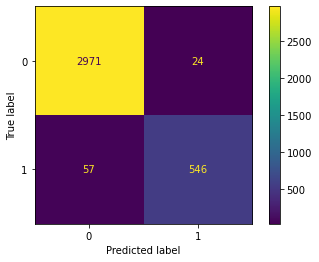

In [67]:
print('Precision score', '%.3f' % precision_score(y_test,y_pred))
print('recall score',  '%.3f' % recall_score(y_test,y_pred))
print('accuracy score',  '%.3f' % accuracy_score(y_test,y_pred))
print('f1_score ',  '%.3f' % f1_score(y_test,y_pred))

# Compute values for confusion matrix
### YOUR CODE HERE ###
cm=confusion_matrix(y_test,y_pred)

# Create display of confusion matrix
### YOUR CODE HERE ###
disp=ConfusionMatrixDisplay(cm)
disp.plot()

plt.show()



In [68]:

parms={'min_samples_leaf':[2,3,5],'min_samples_split':[12,5,8],'n_estimators':[300],'max_features':[2,5,6],
      'max_depth':[14,18,13],'max_samples':[2412,1925]}
scoring = {'accuracy', 'precision', 'recall', 'f1'}
rf=RandomForestClassifier()
model_grid=GridSearchCV(rf,parms,cv=5,scoring=scoring,refit='f1')
model_grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [14, 18, 13], 'max_features': [2, 5, 6],
                         'max_samples': [2412, 1925],
                         'min_samples_leaf': [2, 3, 5],
                         'min_samples_split': [12, 5, 8],
                         'n_estimators': [300]},
             refit='f1', scoring={'recall', 'precision', 'accuracy', 'f1'})

In [69]:
y_pred=model_g.predict(x_test)

In [70]:
# Train data accuracy
train_score=model_grid.score(x_train,y_train)

#Test data accuracy
test_score=model_grid.score(x_test,y_test)

print('Train accuracy','%.4f' %(train_score))
print('Test accuracy ','%.4f' %(test_score))



Train accuracy 0.9517
Test accuracy  0.9346


In [71]:
model_grid.best_estimator_

RandomForestClassifier(max_depth=18, max_features=5, max_samples=2412,
                       min_samples_leaf=2, min_samples_split=8,
                       n_estimators=300)

In [72]:
model_grid.best_score_

0.9461813871859892

In [73]:
def make_results(model_object):
    results=model_object.cv_results_
    cols=[i for i in results.keys() if i.startswith('mean')]
    mean_cols=[results[i] for i in cols]
    mean_cols=[list(i) for i in mean_cols]
    res_2=np.array(mean_cols)
    res_2=res_2.reshape(res_2.shape[1],res_2.shape[0])
    results_df=pd.DataFrame(res_2,columns=cols)
    return results_df[results_df['mean_test_f1']==results_df['mean_test_f1'].max()]


In [74]:
make_results(model_grid)

,mean_fit_time,mean_score_time,mean_test_recall,mean_test_precision,mean_test_accuracy,mean_test_f1
24,1.29807,1.297518,1.309366,1.275466,1.304129,1.296611


Precision score 0.971
recall score 0.900
accuracy score 0.979
f1_score  0.935


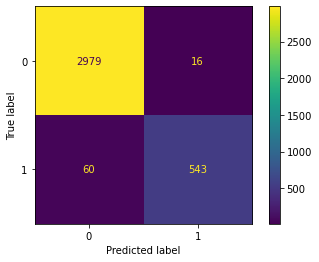

In [75]:
print('Precision score', '%.3f' % precision_score(y_test,y_pred))
print('recall score',  '%.3f' % recall_score(y_test,y_pred))
print('accuracy score',  '%.3f' % accuracy_score(y_test,y_pred))
print('f1_score ',  '%.3f' % f1_score(y_test,y_pred))

# Compute values for confusion matrix
### YOUR CODE HERE ###
cm=confusion_matrix(y_test,y_pred)

# Create display of confusion matrix
### YOUR CODE HERE ###
disp=ConfusionMatrixDisplay(cm)
disp.plot()

plt.show()



In [ ]:
The accuracy score is more for random forest algorithm

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.